In [1]:
import matplotlib.pyplot as plt

from auxiliary.download_data import download_from_switch
download_from_switch(switch_path="/meteoswiss_ulrichen", local_file_path="../.cache/data/meteoswiss_ulrichen");

Download files from remote directory /meteoswiss_ulrichen: 100%|███████████████████████████████████████████████████████| 2/2 [00:00<00:00, 999.71it/s]


In [2]:
from auxiliary.read_ulrichen_data import read_ulrichen_txt_data
all_data = read_ulrichen_txt_data(ulrichen_path="../.cache/data/meteoswiss_ulrichen", where="../.cache/interim/meteoswiss/ulrichen.parquet")

Read file: 100%|██████████| 1/1 [00:00<00:00, 19.22it/s]


In [1]:
from auxiliary.auxiliary import read_pyarrow_data
all_data = read_pyarrow_data(where="../.cache/interim/meteoswiss/ulrichen.parquet")

2023-09-15 10:38:28 B01BPC10 auxiliary.auxiliary[20704] INFO shape: (9, 5)
┌────────────┬─────────────────────┬───────────────────────┬──────────────────────┬────────────────┐
│ describe   ┆ datetime            ┆ global_radiation_w/m2 ┆ temperature_surface_ ┆ wind_speed_m/s │
│ ---        ┆ ---                 ┆ ---                   ┆ c                    ┆ ---            │
│ str        ┆ str                 ┆ f64                   ┆ ---                  ┆ f64            │
│            ┆                     ┆                       ┆ f64                  ┆                │
╞════════════╪═════════════════════╪═══════════════════════╪══════════════════════╪════════════════╡
│ count      ┆ 631296              ┆ 631296.0              ┆ 631296.0             ┆ 631296.0       │
│ null_count ┆ 0                   ┆ 430.0                 ┆ 7499.0               ┆ 789.0          │
│ mean       ┆ null                ┆ 157.903463            ┆ 5.121414             ┆ 1.648604       │
│ std        ┆ n

<Axes: >

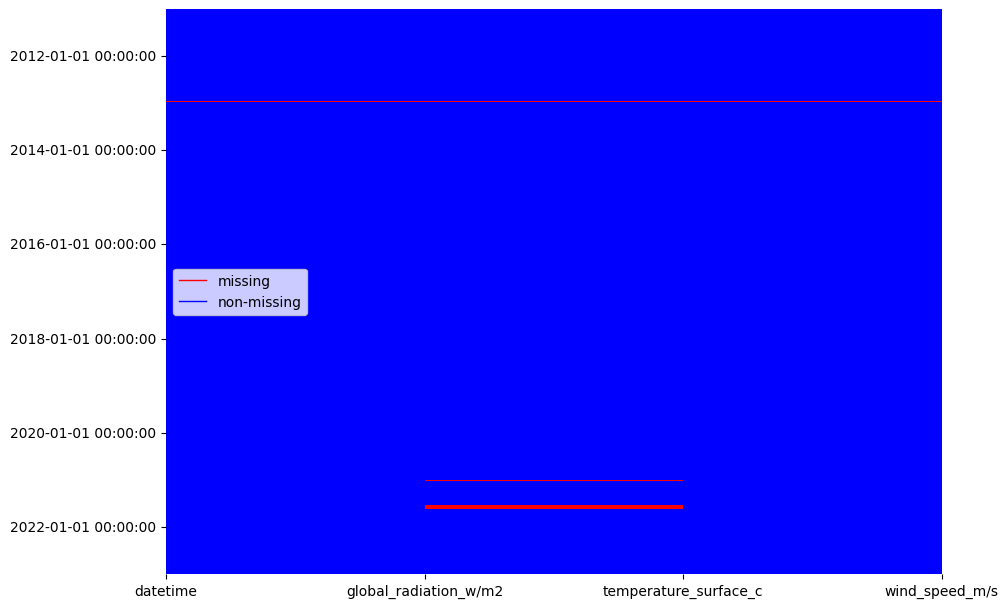

In [4]:
from pre_analyses.missing_ulrich_data import missing_matrix_ulrich
missing_matrix_ulrich(all_data)

D:\smallflex-vpp-codes\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\smallflex-vpp-codes\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\smallflex-vpp-codes\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\smallflex-vpp-codes\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Axes: xlabel='datetime', ylabel='wind_speed_m/s'>

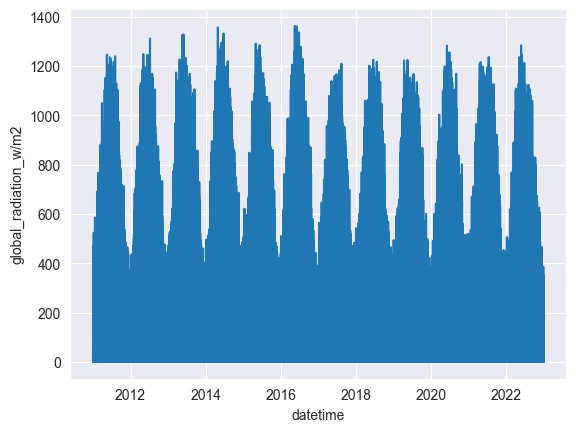

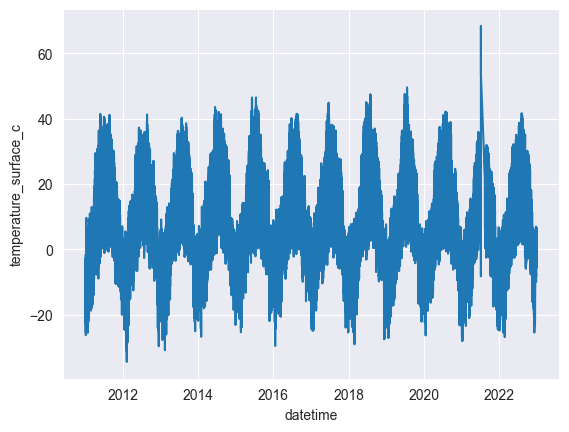

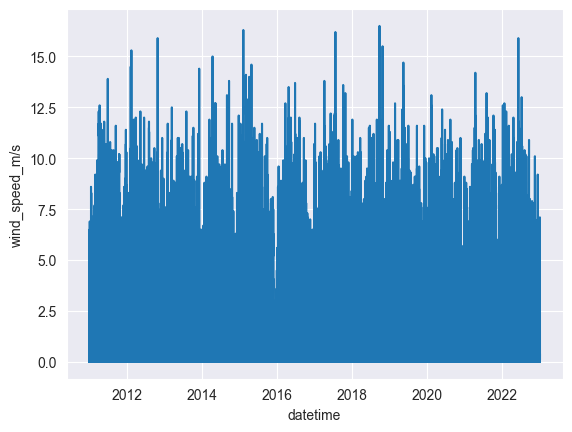

In [5]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = all_data.set_sorted("datetime", descending=False).upsample(time_column="datetime", every="10m").with_columns(pl.all().exclude(["datetime"]).fill_null(np.nan))
sns.lineplot(df, x="datetime", y="global_radiation_w/m2")
plt.figure()
sns.lineplot(df, x="datetime", y="temperature_surface_c")
plt.figure()
sns.lineplot(df, x="datetime", y="wind_speed_m/s")